In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import yaml
import os
import sys
import time
import threading

In [2]:
def get_average_image(input, output):
    vid = cv2.VideoCapture(input)
    success, frame = vid.read()
    average = np.zeros(frame.shape)
    num_frames = 0
    while success:
        num_frames += 1
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) / 255.0
        average += frame.astype(np.float64)
        success, frame = vid.read()
    average = average / num_frames
    return average

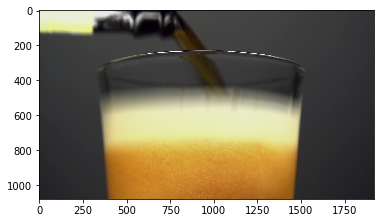

In [3]:
average = get_average_image("inputs/beer.mp4", "results/beer_average.png")
plt.imshow(average)

In [4]:
# frames = []
# vid = cv2.VideoCapture("inputs/beer.mp4")
# success, frame = vid.read()
# while success:
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#     frames.append(frame.astype(np.float64))
#     success, frame = vid.read()
# video = np.stack(frames, axis = 0)


In [5]:
# avg = np.mean(video, axis=0)

In [6]:
# plt.imshow(avg/255)

In [7]:
"""
Returns the mean RGB pixel variances, computed within the green strokes across all frames of the output video
:param input:   string          video path   
:param average: numpy.ndarray   float64 array with the average RGB pixel values
:param m:    numpy.ndarray   boolean array where the green strokes are True and everything else is False
:return: numpy.ndarray
(1080, 1920, 3)
"""
def get_variances2(input, average, m):
    vid = cv2.VideoCapture(input)
    success, frame = vid.read()
    print(frame.shape)
    var_avg = np.zeros(frame.shape)
    num_frames = 0
    while success:
        num_frames += 1
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) / 255.0
        var = np.sqrt(np.abs(frame - average))
        var_avg += var
        success, frame = vid.read()
    var_avg = var_avg / num_frames
    var = np.ma.masked_array(var_avg, mask=m)
    return np.mean(var)

In [8]:
mask = np.zeros((1080, 1920, 3), dtype=bool)
var = get_variances2("inputs/beer.mp4", average, mask)
print(var)

(1080, 1920, 3)
0.11827504956993275
